UBER DATA ANALYSIS: 
This dataset includes the data of uber's cab's pickup points bifurcated into two umberallas those are 'Airport' and 'City'. By this dataset we are also getting the information of percentage of ride completion and finding out the problem where we have to work on for resolving the ride cancellation issue.

DESCRIPTION: This dataset is taken from 'Kaggle' and it consists of 6745 rows and 6 columns. We are the information from the graphs about the distribution of rides taken from Airport and City, frequency of requests for the ride, time period 

In [3]:
#Here we are importing the necessary libraries required for our project.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
#By using the library pandas we are reading the csv file which contains the dataset and printing thye csv file.
df = pd.read_csv(r"C:\Users\NILANSHU\Desktop\Python\Minor Project\Uber Request Data.csv")
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [11]:
#This gives us all the basic necessary information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [13]:
#Checking for null values.
print(df.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [15]:
##This line is doing the work of finding the missing values.
df.ffill(inplace = True)

In [22]:
cars_NA = len(df[df['Status'] == 'No Cars Available'])
trips_cancel = len(df[df['Status'] == 'Cancelled'])
print("No. of request not accepted due to unavailability of cars: ",cars_NA)
print("No. of unattended requests (cars not available + driver cancelled): ",cars_NA + trips_cancel)

No. of request not accepted due to unavailability of cars:  2650
No. of unattended requests (cars not available + driver cancelled):  3914


In [24]:
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

In [26]:
X = df.drop(columns=['Request id'])  # Assuming 'Request id' is not a useful feature
y = df['Status']  # Predicting 'Status'

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Machine Learning Models:

In [33]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

In [35]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'\n{name} Model Performance:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))


Random Forest Model Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       509
           2       1.00      1.00      1.00       573

    accuracy                           1.00      1349
   macro avg       1.00      1.00      1.00      1349
weighted avg       1.00      1.00      1.00      1349


Logistic Regression Model Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       509
           2       1.00      1.00      1.00       573

    accuracy                           1.00      1349
   macro avg       1.00      1.00      1.00      1349
weighted avg       1.00      1.00      1.00      1349


SVM Model Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00

PLOTS OF VISUALIZATION

Text(0.5, 1.0, 'Distribution of Request Status')

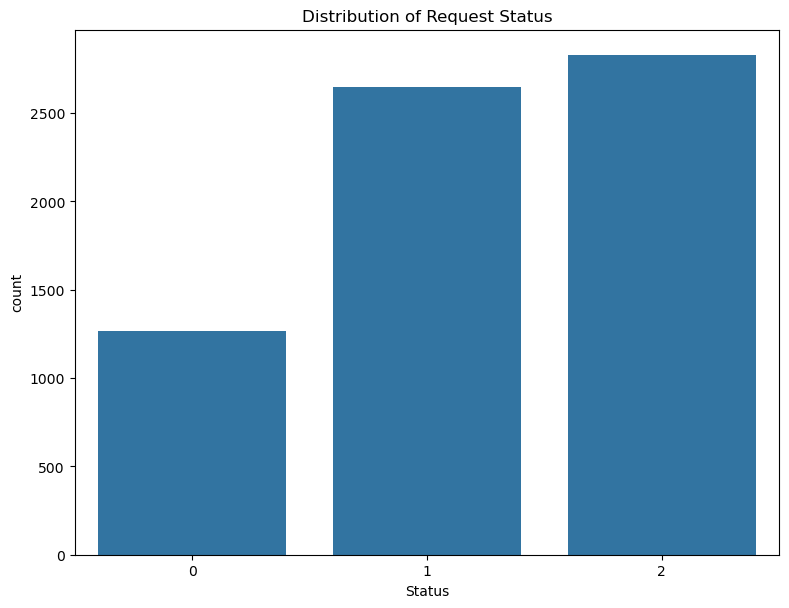

In [38]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.countplot(x='Status', data=df)
plt.title('Distribution of Request Status')

Text(0.5, 1.0, 'Distribution of Pickup Points')

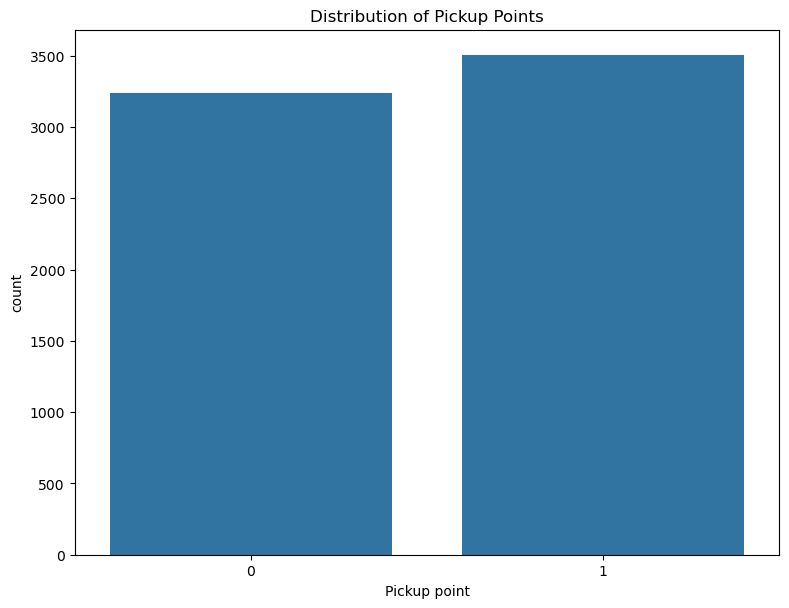

In [40]:
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 2)
sns.countplot(x='Pickup point', data=df)
plt.title('Distribution of Pickup Points')

Text(0.5, 1.0, 'Request Frequency by Hour')

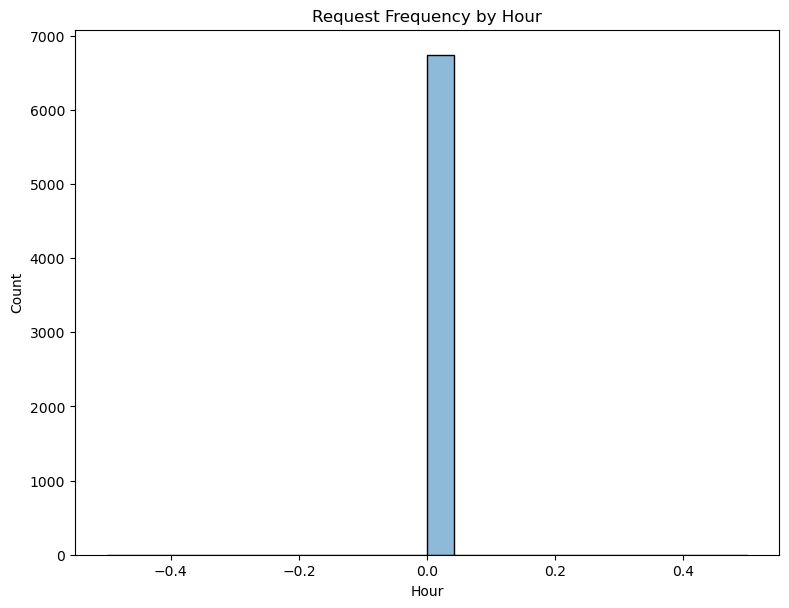

In [42]:
plt.figure(figsize=(20, 15))
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Hour'] = df['Request timestamp'].dt.hour
plt.subplot(2, 2, 3)
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title('Request Frequency by Hour')

Text(0.5, 1.0, 'Feature Correlation Heatmap')

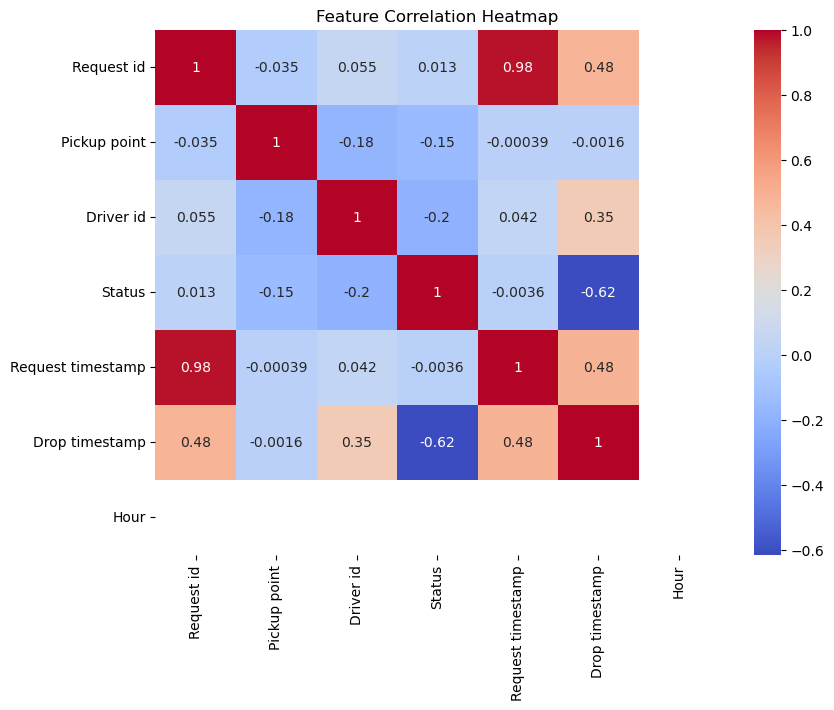

In [44]:
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 4)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')

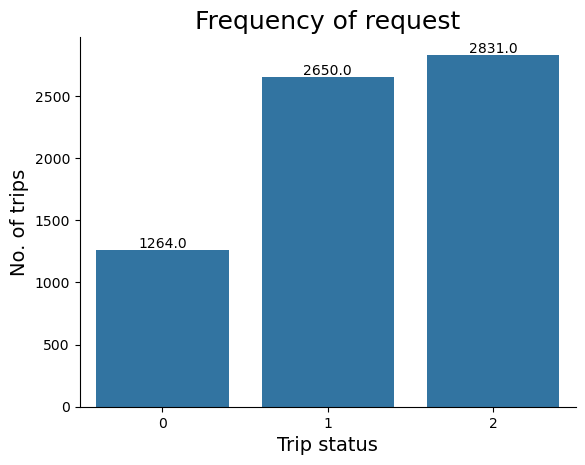

In [46]:
g = sns.countplot(x="Status", data=df)
sns.despine()
plt.title("Frequency of request", fontsize = 18)
plt.xlabel("Trip status", fontsize = 14)
plt.ylabel("No. of trips", fontsize = 14)

for p in g.patches:
    g.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height() + 50), ha = 'center', va = 'center')

plt.show()

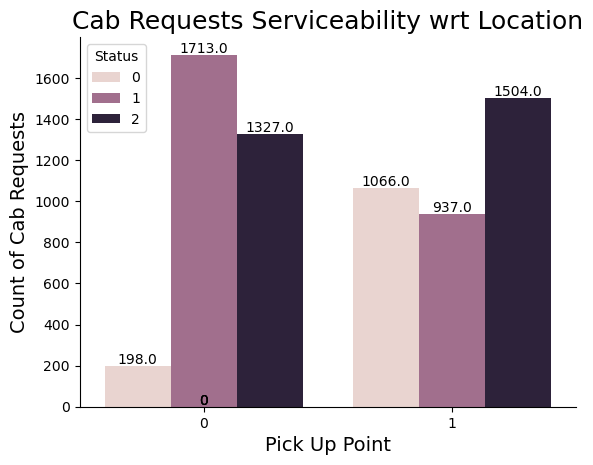

In [48]:
l = sns.countplot(x = "Pickup point", hue = "Status", data = df)
sns.despine()
plt.title("Cab Requests Serviceability wrt Location", fontsize = 18)
plt.xlabel("Pick Up Point", fontsize = 14)
plt.ylabel("Count of Cab Requests", fontsize = 14)

for p in l.patches:
    l.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height() + 30), ha = 'center', va = 'center')

plt.show()